# <center> **PROJECT-3. Анализ воронки**

## <center> Cтудент ПАНФИЛОВА ОЛЬГА, группа SDA-215

# **Содержание**

### Цель исследования:
#### Исследовать поведение пользователей, зарегистрировавшихся в 2018 году, в обновлённом приложении Quiz Freeze.

### Задачи:
#### В рамках проверки гипотез вам необходимо решить три задачи:

1. Определить, насколько обучение сокращает время прохождения этапов игры.

2. Доказать, что успешное обучение само по себе влияет на оплату и не имеет значения то, каким этапом оно шло.

3. Определить, насколько прозрачен процесс взаимодействия с игрой.



### Конкретные шаги (формализованные задачи):

* Сравнить время прохождения различных этапов для пользователей, которые завершили обучение, и пользователей, не начинавших обучение. Если показатель отличается, выяснить, насколько.

* Проверить, существует ли зависимость между вероятностью оплаты вопросов и количеством обучений, которые начинал или завершал пользователь. 

* Выяснить, как часто пользователи начинают обучение после выбора уровня сложности. (Это позволит оценить прозрачность процесса взаимодействия с игрой: если пользователи после выбора уровня сложности обращаются к обучению, значит, работа с приложением непонятна.)

# **Описание данных**

## Таблица Event
### Хранит данные о событиях, которые совершают пользователи. По сути, каждое событие — это факт прохождения пользователем какого-либо этапа игры

* **id** - идентификатор события
* **user_id** - уникальный идентификатор пользователя, совершившего событие в приложении
* **start_time** - дата и время события

* **event_type** - тип события (значения: 
    * **registration** — регистрация; 
    * **tutorial_start** — начало обучения; 
    * **tutorial_finish** — завершение обучения; 
    * **level_choice** — выбор уровня сложности; 
    * **pack_choice** — выбор пакетов вопросов)

* **tutorial_id** - идентификатор обучения (этот идентификатор есть только у событий обучения)
* **selected_level** - выбранный уровень сложности обучения

## Таблица purchase
### Хранит данные об оплатах, которые совершают пользователи.

* **id** - идентификатор события
* **user_id** - уникальный идентификатор пользователя, совершившего событие в приложении
* **event_datetime** - дата и время события/покупки
* **amount** - сумма оплаты

## Этапы игры

**Регистрация (registration)** — это обязательный этап. Без регистрации пользователь не может пройти на следующие этапы работы с приложением.

**Старт обучения (tutorial start)** — опциональный этап. Пользователь после регистрации может перейти к обучению работе с приложением, а может и не перейти. При этом вернуться к обучению можно в любой момент. А ещё можно пройти обучение несколько раз.

**Завершение обучения (tutorial finish)** может произойти только в случае, если ранее произошло событие «Старт обучения», но при этом пользователь может не завершить обучение.

**Выбор уровня сложности вопросов (level choice)** — это обязательное событие, которое нужно для того, чтобы перейти к выбору пакетов вопросов. Таким образом, пользователь может не пройти обучение или даже не начинать его, но прежде чем начать отвечать, он обязан выбрать уровень сложности.

**Выбор пакетов вопросов (pack choice, другое название training choice)** — это этап, на котором пользователь выбирает себе бесплатный набор пакетов вопросов, на которые он будет отвечать.

**Покупка платных пакетов вопросов (purchase)** — это факт совершения оплаты за вопросы, которые не доступны в списке бесплатных вопросов.

## Подготовка  данных

In [1]:
import pandas as pd #импорт pandas
import numpy as np #импорт для мат. вычислений
import matplotlib #импорт для построения графиков
import matplotlib.pyplot as plt
%matplotlib inline
import plotly as px #импорт для визуализации данных
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Подготовка данных
events = pd.read_csv('events.csv') #загружаем файл events
purchase = pd.read_csv('purchase.csv') #загружаем файл purchase

In [3]:
# перевод дат в нужный тип данных
events['start_time'] = pd.to_datetime(events['start_time'], errors='coerce')
purchase['event_datetime'] = pd.to_datetime(purchase['event_datetime'], errors='coerce')

events = events.rename(columns={"start_time": "event_datetime"})
purchase['event_type'] = 'purchase'

events = events[(events['event_datetime'] >= '2018-01-01 00:00:00') & (events['event_datetime'] <= '2018-12-31 23:59:59')]
purchase = purchase[(purchase['event_datetime'] >= '2018-01-01 00:00:00') & (purchase['event_datetime'] <= '2018-12-31 23:59:59')]

In [4]:
# вывод таблицы events 
events

,id,event_type,selected_level,event_datetime,tutorial_id,user_id
51405,80308,registration,NaN,2018-01-01 03:48:40,NaN,27832
51406,80309,registration,NaN,2018-01-01 04:07:25,NaN,27833
51407,80310,registration,NaN,2018-01-01 08:35:10,NaN,27834
51408,80311,registration,NaN,2018-01-01 11:54:47,NaN,27835
51409,80312,registration,NaN,2018-01-01 13:28:07,NaN,27836
...,...,...,...,...,...,...
118352,147255,registration,NaN,2018-12-31 21:15:14,NaN,47755
118353,147256,level_choice,medium,2018-12-31 22:36:19,NaN,47753
118354,147257,pack_choice,NaN,2018-12-31 22:38:05,NaN,47753
118355,147258,registration,NaN,2018-12-31 23:17:30,NaN,47756


In [5]:
events['event_type'].value_counts()

event_type
registration       19926
tutorial_start     18048
tutorial_finish    14902
level_choice        8340
pack_choice         5736
Name: count, dtype: int64

In [6]:
# вывод таблицы purchase 
purchase

,id,user_id,event_datetime,amount,event_type
1164,16838,27791,2018-01-01 12:37:02,100,purchase
1165,16839,27776,2018-01-01 23:15:21,25,purchase
1166,16840,27799,2018-01-01 23:23:49,50,purchase
1167,16841,27813,2018-01-02 09:53:55,50,purchase
1168,16842,27594,2018-01-02 18:48:55,100,purchase
...,...,...,...,...,...
2761,18435,47520,2018-12-31 14:53:41,50,purchase
2762,18436,47338,2018-12-31 15:46:58,200,purchase
2763,18437,47635,2018-12-31 16:32:52,150,purchase
2764,18438,47665,2018-12-31 17:13:00,50,purchase


In [7]:
# объединение таблиц
total_data = pd.concat([events, purchase]).reset_index(drop=True)
total_data

,id,event_type,selected_level,event_datetime,tutorial_id,user_id,amount
0,80308,registration,NaN,2018-01-01 03:48:40,NaN,27832,NaN
1,80309,registration,NaN,2018-01-01 04:07:25,NaN,27833,NaN
2,80310,registration,NaN,2018-01-01 08:35:10,NaN,27834,NaN
3,80311,registration,NaN,2018-01-01 11:54:47,NaN,27835,NaN
4,80312,registration,NaN,2018-01-01 13:28:07,NaN,27836,NaN
...,...,...,...,...,...,...,...
68549,18435,purchase,NaN,2018-12-31 14:53:41,NaN,47520,50.0
68550,18436,purchase,NaN,2018-12-31 15:46:58,NaN,47338,200.0
68551,18437,purchase,NaN,2018-12-31 16:32:52,NaN,47635,150.0
68552,18438,purchase,NaN,2018-12-31 17:13:00,NaN,47665,50.0


In [8]:
# Проверка того, что все значения попадают в период 2018 года
print(events['event_datetime'].min())
print(events['event_datetime'].max())

2018-01-01 03:48:40
2018-12-31 23:18:06


# **ГИПОТЕЗА №1**
Определим, насколько обучение сокращает время прохождения этапов игры.

### 1. Деление на группы, которые завершили и не начинали обучение

Основные группы пользователей:
- начали и завершили обучение в игре
- не начинали обучение в игре

In [9]:
# 1 группа - начали и завершили обучение в игре
# Находим id тех, кто завершил обучение, потом выбираем из таблицы этих пользователей
id_user_finished = total_data[total_data['event_type']=='tutorial_finish']['user_id']
finished_group = total_data[total_data['user_id'].isin(id_user_finished)]

unique_finish_users = len(finished_group['user_id'].unique())
print(unique_finish_users)

finished_group

10248


,id,event_type,selected_level,event_datetime,tutorial_id,user_id,amount
1,80309,registration,NaN,2018-01-01 04:07:25,NaN,27833,NaN
2,80310,registration,NaN,2018-01-01 08:35:10,NaN,27834,NaN
3,80311,registration,NaN,2018-01-01 11:54:47,NaN,27835,NaN
4,80312,registration,NaN,2018-01-01 13:28:07,NaN,27836,NaN
7,80315,tutorial_start,NaN,2018-01-01 14:54:40,31505.0,27836,NaN
...,...,...,...,...,...,...,...
68549,18435,purchase,NaN,2018-12-31 14:53:41,NaN,47520,50.0
68550,18436,purchase,NaN,2018-12-31 15:46:58,NaN,47338,200.0
68551,18437,purchase,NaN,2018-12-31 16:32:52,NaN,47635,150.0
68552,18438,purchase,NaN,2018-12-31 17:13:00,NaN,47665,50.0


In [10]:
finished_group['event_type'].value_counts()

event_type
tutorial_start     16385
tutorial_finish    14902
registration       10248
level_choice        7499
pack_choice         5175
purchase            1441
Name: count, dtype: int64

In [11]:
# 2 группа - не начинали обучение
# Находим id тех, кто начинал обучение, потом оставим в основной таблице тех, кто не прошел этот этап (не начинал обучение)
id_user_start = total_data[total_data['event_type']=='tutorial_start']['user_id']
not_start_group = total_data[~total_data['user_id'].isin(id_user_start)]

unique_not_start_users = len(not_start_group['user_id'].unique())
print(unique_not_start_users)

not_start_group


8078


,id,event_type,selected_level,event_datetime,tutorial_id,user_id,amount
0,80308,registration,NaN,2018-01-01 03:48:40,NaN,27832,NaN
5,80313,registration,NaN,2018-01-01 14:08:40,NaN,27837,NaN
6,80314,registration,NaN,2018-01-01 14:42:58,NaN,27838,NaN
27,80335,registration,NaN,2018-01-02 00:13:22,NaN,27844,NaN
37,80345,registration,NaN,2018-01-02 06:05:02,NaN,27848,NaN
...,...,...,...,...,...,...,...
68376,18262,purchase,NaN,2018-11-30 00:40:53,NaN,45399,100.0
68390,18276,purchase,NaN,2018-12-01 11:57:18,NaN,45961,50.0
68399,18285,purchase,NaN,2018-12-02 13:25:31,NaN,45518,250.0
68437,18323,purchase,NaN,2018-12-09 22:25:45,NaN,46548,200.0


In [12]:
not_start_group['event_type'].value_counts()

event_type
registration    8070
level_choice      98
pack_choice       74
purchase          30
Name: count, dtype: int64

### 2. Деление на этапы, которые прошли пользователи

- (таблица 1) этап Регистрация (registration)
- (таблица 2) этап Выбора уровня сложности (level_choice)
- (таблица 3) этап Выбора пакетов вопросов (pack_choic)
- (таблица 4) этап Покупки платных пакетов (purchase)

#### 2.1 Создание датафреймов для группы, которая не проходила обучение

In [13]:
# Cоздание датафреймов для кажодого этапа отдельно:

# 1 этап
not_start_group_1 = not_start_group[not_start_group['event_type']=='registration'].reset_index(drop=True)
# 2 этап
not_start_group_2 = not_start_group[not_start_group['event_type']=='level_choice'].reset_index(drop=True)
# 3 этап
not_start_group_3 = not_start_group[not_start_group['event_type']=='pack_choice'].reset_index(drop=True)
# 4 этап
not_start_group_4 = not_start_group[not_start_group['event_type']=='purchase'].reset_index(drop=True)

In [14]:
# Для полученных таблиц сделаем срез по ключевым столбцам:

# Исключаем дубли для 1-ой таблицы 
not_start_group_1 = not_start_group_1.sort_values('event_datetime').drop_duplicates('user_id')
# Выполним срез и переименуем нужные столбцы
not_start_group_1 = not_start_group_1[['user_id','event_type','event_datetime']]\
    .rename(columns={'event_datetime':'reg_t'}).reset_index(drop=True)

# Исключаем дубли для 2-ой таблицы 
not_start_group_2 = not_start_group_2.sort_values('event_datetime').drop_duplicates('user_id')
# Выполним срез и переименуем нужные столбцы
not_start_group_2 = not_start_group_2[['user_id','event_type','event_datetime']]\
    .rename(columns={'event_datetime':'lev_t'}).reset_index(drop=True)

# Исключаем дубли для 3-ой таблицы 
not_start_group_3 = not_start_group_3.sort_values('event_datetime').drop_duplicates('user_id')
# Выполним срез и переименуем нужные столбцы
not_start_group_3 = not_start_group_3[['user_id','event_type','event_datetime']]\
    .rename(columns={'event_datetime':'pack_t'}).reset_index(drop=True)

# Исключаем дубли для 4-ой таблицы 
not_start_group_4 = not_start_group_4.sort_values('event_datetime').drop_duplicates('user_id')
# Выполним срез и переименуем нужные столбцы
not_start_group_4 = not_start_group_4[['user_id','event_type','event_datetime']]\
    .rename(columns={'event_datetime':'purch_t'}).reset_index(drop=True)

In [15]:
# объединяю таблицы в один датафрейм, в качестве ключа используем 'user_id':

not_start_group_all = not_start_group_1.merge(
    not_start_group_2, on='user_id', suffixes=('_reg', '_lev')).merge(
    not_start_group_3, on='user_id', suffixes=('_lev', '_pack')).merge(
    not_start_group_4, on='user_id', suffixes=('_pack', '_purch')
    )

not_start_group_all.head()

,user_id,event_type_reg,reg_t,event_type_lev,lev_t,event_type_pack,pack_t,event_type_purch,purch_t
0,28033,registration,2018-01-08 16:52:19,level_choice,2018-01-08 17:06:39,pack_choice,2018-01-08 17:11:52,purchase,2018-01-16 05:08:41
1,28928,registration,2018-01-24 04:55:27,level_choice,2018-01-24 13:57:03,pack_choice,2018-01-24 14:06:56,purchase,2018-01-29 14:47:12
2,31161,registration,2018-03-04 21:30:50,level_choice,2018-03-05 08:01:52,pack_choice,2018-03-05 08:07:16,purchase,2018-03-09 14:10:27
3,32975,registration,2018-03-26 20:17:00,level_choice,2018-03-27 02:13:03,pack_choice,2018-03-27 02:16:38,purchase,2018-04-01 08:53:29
4,33253,registration,2018-03-30 13:48:43,level_choice,2018-03-30 14:32:06,pack_choice,2018-03-30 14:34:41,purchase,2018-04-06 03:49:04


In [16]:
# Находим delta времени для разных этапов и находим среднее значение для различных этапов пользователей, которые не начинали обучение:
#  - delta времени от регистрации до момента выбора уровня сложности
not_start_group_all["stage_1"] =(not_start_group_all["lev_t"] - not_start_group_all["reg_t"]) / pd.Timedelta('1 hour')
not_start_stage_1 = round(not_start_group_all["stage_1"].mean(),2)
#  - delta времени от выбора уровня сложности до момента выбора пакета вопросов
not_start_group_all["stage_2"] = (not_start_group_all["pack_t"] - not_start_group_all["lev_t"]) / pd.Timedelta('1 hour')
not_start_stage_2 = round(not_start_group_all["stage_2"].mean(),2)
#  - delta времени от выбора пакета вопросов до момента оплаты
not_start_group_all["stage_3"] = (not_start_group_all["purch_t"] - not_start_group_all["pack_t"]) / pd.Timedelta('1 hour')
not_start_stage_3 = round(not_start_group_all["stage_3"].mean(),2)
#  - delta времени от регистрации до момента оплаты
not_start_group_all["stage_4"] = (not_start_group_all["purch_t"] - not_start_group_all["reg_t"]) / pd.Timedelta('1 hour')
not_start_stage_4 = round(not_start_group_all["stage_4"].mean(),2)


print('Среднее время, от регистрации до момента выбора уровня сложности: {} час.'.format(not_start_stage_1))
print('Среднее время, от выбора уровня сложности до момента выбора пакета вопросов: {} час.'.format(not_start_stage_2))
print('Среднее время, от выбора пакета вопросов до момента оплаты: {} час.'.format(not_start_stage_3))
print('Среднее время, от регистрации до момента оплаты: {} час.'.format(not_start_stage_4))

#not_start_group_all

Среднее время, от регистрации до момента выбора уровня сложности: 4.18 час.
Среднее время, от выбора уровня сложности до момента выбора пакета вопросов: 0.09 час.
Среднее время, от выбора пакета вопросов до момента оплаты: 100.83 час.
Среднее время, от регистрации до момента оплаты: 105.1 час.


#### 2.2 Создание датафреймов для группы, которая завершила обучение

In [17]:
# Cоздание датафреймов для кажодого этапа отдельно:

# 1 этап
finished_group_1 = finished_group[finished_group['event_type']=='registration'].reset_index(drop=True)
# 2 этап
finished_group_2 = finished_group[finished_group['event_type']=='level_choice'].reset_index(drop=True)
# 3 этап
finished_group_3 = finished_group[finished_group['event_type']=='pack_choice'].reset_index(drop=True)
# 4 этап
finished_group_4 = finished_group[finished_group['event_type']=='purchase'].reset_index(drop=True)

In [18]:
# Для полученных таблиц сделаем срез по ключевым столбцам:

# Исключаем дубли для 1-ой таблицы 
finished_group_1 = finished_group_1.sort_values('event_datetime').drop_duplicates('user_id')
# Выполним срез и переименуем нужные столбцы
finished_group_1 = finished_group_1[['user_id','event_type','event_datetime']]\
    .rename(columns={'event_datetime':'reg_t'}).reset_index(drop=True)

# Исключаем дубли для 2-ой таблицы 
finished_group_2 = finished_group_2.sort_values('event_datetime').drop_duplicates('user_id')
# Выполним срез и переименуем нужные столбцы
finished_group_2 = finished_group_2[['user_id','event_type','event_datetime']]\
    .rename(columns={'event_datetime':'lev_t'}).reset_index(drop=True)

# Исключаем дубли для 3-ой таблицы 
finished_group_3 = finished_group_3.sort_values('event_datetime').drop_duplicates('user_id')
# Выполним срез и переименуем нужные столбцы
finished_group_3 = finished_group_3[['user_id','event_type','event_datetime']]\
    .rename(columns={'event_datetime':'pack_t'}).reset_index(drop=True)

# Исключаем дубли для 4-ой таблицы 
finished_group_4 = finished_group_4.sort_values('event_datetime').drop_duplicates('user_id')
# Выполним срез и переименуем нужные столбцы
finished_group_4 = finished_group_4[['user_id','event_type','event_datetime']]\
    .rename(columns={'event_datetime':'purch_t'}).reset_index(drop=True)

In [19]:
# объединяю таблицы в один датафрейм, в качестве ключа используем 'user_id':

finished_group_all = finished_group_1.merge(
    finished_group_2, on='user_id', suffixes=('_reg', '_lev')).merge(
    finished_group_3, on='user_id', suffixes=('_lev', '_pack')).merge(
    finished_group_4, on='user_id', suffixes=('_pack', '_purch')
    )

finished_group_all.head()

,user_id,event_type_reg,reg_t,event_type_lev,lev_t,event_type_pack,pack_t,event_type_purch,purch_t
0,27845,registration,2018-01-02 01:35:56,level_choice,2018-01-02 06:19:18,pack_choice,2018-01-02 06:25:12,purchase,2018-01-03 18:53:43
1,27884,registration,2018-01-04 11:50:43,level_choice,2018-01-04 16:18:39,pack_choice,2018-01-04 16:22:03,purchase,2018-01-08 19:37:34
2,27910,registration,2018-01-05 10:45:33,level_choice,2018-01-05 11:59:50,pack_choice,2018-01-05 12:05:28,purchase,2018-01-07 12:11:34
3,27940,registration,2018-01-05 23:41:24,level_choice,2018-01-06 00:32:47,pack_choice,2018-01-06 00:39:06,purchase,2018-01-07 13:16:41
4,27969,registration,2018-01-06 19:37:25,level_choice,2018-01-06 20:33:19,pack_choice,2018-01-06 20:36:37,purchase,2018-01-08 01:18:23


In [20]:
# Находим delta времени для разных этапов и находим среднее значение для различных этапов пользователей, которые закончили обучение:
#  - delta времени от регистрации до момента выбора уровня сложности
finished_group_all["stage_1"] = (finished_group_all["lev_t"] - finished_group_all["reg_t"]) / pd.Timedelta('1 hour')
finished_group_stage_1 = round(finished_group_all["stage_1"].mean(),2)
#  - delta времени от выбора уровня сложности до момента выбора пакета вопросов
finished_group_all["stage_2"] = (finished_group_all["pack_t"] - finished_group_all["lev_t"]) / pd.Timedelta('1 hour')
finished_group_stage_2 = round(finished_group_all["stage_2"].mean(),2)
#  - delta времени от выбора пакета вопросов до момента оплаты
finished_group_all["stage_3"] = (finished_group_all["purch_t"] - finished_group_all["pack_t"]) / pd.Timedelta('1 hour')
finished_group_stage_3 = round(finished_group_all["stage_3"].mean(),2)
#  - delta времени от регистрации до момента оплаты
finished_group_all["stage_4"] = (finished_group_all["purch_t"] - finished_group_all["reg_t"]) / pd.Timedelta('1 hour')
finished_group_stage_4 = round(finished_group_all["stage_4"].mean(),2)
print('Среднее время, от регистрации до момента выбора уровня сложности: {} час.'.format(finished_group_stage_1))
print('Среднее время, от выбора уровня сложности до момента выбора пакета вопросов: {} час.'.format(finished_group_stage_2))
print('Среднее время, от выбора пакета вопросов до момента оплаты: {} час.'.format(finished_group_stage_3))
print('Среднее время, от регистрации до момента оплаты: {} час.'.format(finished_group_stage_4))

#finished_group_all

Среднее время, от регистрации до момента выбора уровня сложности: 7.1 час.
Среднее время, от выбора уровня сложности до момента выбора пакета вопросов: 0.09 час.
Среднее время, от выбора пакета вопросов до момента оплаты: 89.12 час.
Среднее время, от регистрации до момента оплаты: 96.3 час.


### В рамках первой гипотезы построим столбчатую диаграмму, отражающую время прохождения различных этапов для пользователей, которые прошли обучение, и для пользователей, не начинавших обучение.

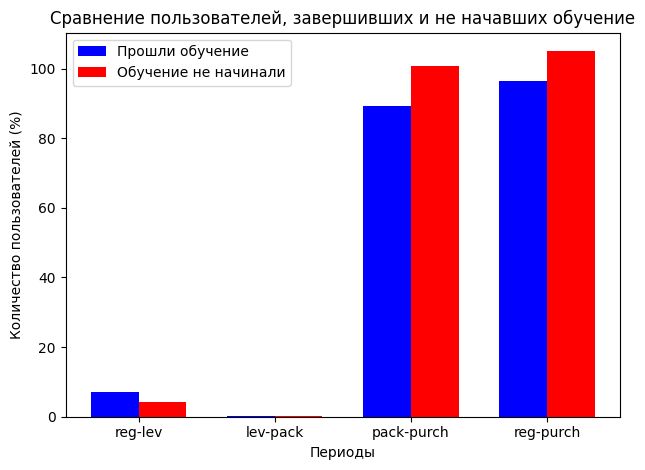

In [21]:

import numpy as np
import matplotlib.pyplot as plt

# Данные для диаграммы
periods = ["reg-lev", "lev-pack", "pack-purch", "reg-purch"]
users_completed = [7.1, 0.09, 89.12, 96.3]
users_not_started = [4.18, 0.09, 100.83, 105.1]

# Параметры
bar_width = 0.35  # Ширина столбцов
index = np.arange(len(periods))  # Позиции для категорий

# Создание сгруппированных столбцов
fig, ax = plt.subplots()
bars1 = ax.bar(index, users_completed, bar_width, label='Прошли обучение', color='blue')
bars2 = ax.bar(index + bar_width, users_not_started, bar_width, label='Обучение не начинали', color='red')

# Добавление заголовка и меток осей
ax.set_title('Сравнение пользователей, завершивших и не начавших обучение')
ax.set_xlabel('Периоды')
ax.set_ylabel('Количество пользователей (%)')
ax.set_xticks(index + bar_width / 2)  # Позиции меток по оси X
ax.set_xticklabels(periods)
ax.legend()

# Показать диаграмму
plt.tight_layout()  # Упаковка элементов для лучшего отображения
plt.show()



### Вывод:
На представленой выше диаграмме, мы видим отличие времени прохождения различных этапов у пользователей, которые прошли обучение, и пользователей, не начинавших обучение. Гипотеза подтверждается, обучение сокращает время прохождения этапов игры, но не на первых двух этапов.  
* Среднее время, от регистрации до момента выбора уровня сложности: не проходили обучение 7.1 час., проходили обучение 4.18 час. 
* Среднее время, от выбора уровня сложности до момента выбора пакета вопросов: 0.09 час. одинаковое врем для двух групп
* Среднее время, от выбора пакета вопросов до момента оплаты: не проходили обучение 89.12 час., проходили обучение 100.83 час.
* Среднее время, от регистрации до момента оплаты: не проходили обучение 96.3 час., проходили обучение 105.1 час.

# **ГИПОТЕЗА №2**
Доказать, что успешное обучение само по себе влияет на оплату и не имеет значения то, каким этапом оно шло.

#### Создадим 2 сводные таблицы, для определения пользователей на группы по количеству стартов обучения и по завершению обучения


1. Найдем пользователей, которые начинали обучение

In [22]:
tutorial_start_group = total_data.pivot_table (values = ['event_datetime'], index = ['user_id'], \
                                        columns = ['event_type'], aggfunc = 'count', fill_value = 0).reset_index()
tutorial_start_group.columns = ['user_id', 'level_choice', 'pack_choice', 'purchase', 'registration', 'tutorial_finish', 'tutorial_start']
# Сгруппируем пользователей, которые начинали обучение, по фактам регистрации и оплаты платных пакетов вопросов
tutorial_start_group_repeat = tutorial_start_group.groupby(['tutorial_start'])[['registration', 'purchase']].agg(sum).reset_index()

tutorial_start_group_repeat['percent'] = round(tutorial_start_group_repeat['purchase']/tutorial_start_group_repeat['registration']*100, 1)
display(tutorial_start_group_repeat)

,tutorial_start,registration,purchase,percent
0,0,8070,30,0.4
1,1,9101,1202,13.2
2,2,1589,218,13.7
3,3,427,50,11.7
4,4,221,30,13.6
5,5,109,16,14.7
6,6,116,14,12.1
7,7,94,12,12.8
8,8,86,13,15.1
9,9,113,17,15.0


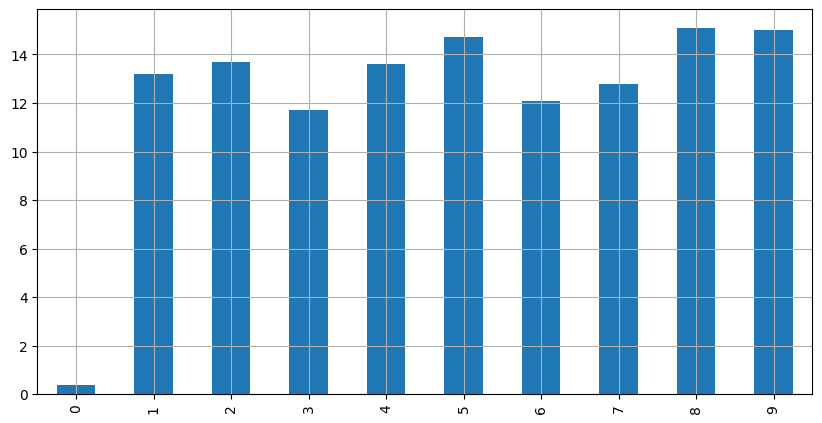

In [23]:
# Построим диаграмму:

tutorial_start_group_repeat['percent'].plot(
    kind='bar',
    grid=True,
    figsize=(10, 5)
);

Исходя из представленных выше данных, мы можем заметить, что процентное соотношение варьируется от 11,7 % до 15,1 %. Максимальное количество пользователей оплатили пакет вопросов на 2 попытке. Гипотеза подтверждается, успешное обучение само по себе влияет на оплату и не имеет значения то, каким этапом оно шло.

2. Определим пользователей, которые закончили обучение

In [24]:
tutorial_finished_group = total_data.pivot_table (values = ['event_datetime'], index = ['user_id'], \
                                        columns = ['event_type'], aggfunc = 'count', fill_value = 0).reset_index()
tutorial_finished_group.columns = ['user_id', 'level_choice', 'pack_choice', 'purchase', 'registration', 'tutorial_finish', 'tutorial_start']
# Сгруппируем пользователей, которые закончили обучение, по фактам регистрации и оплаты
tutorial_finished_group_repeat = tutorial_finished_group.groupby(['tutorial_finish'])[['registration', 'purchase']].agg(sum).reset_index()

tutorial_finished_group_repeat['percent'] = round(tutorial_finished_group_repeat['purchase']/tutorial_finished_group_repeat['registration']*100, 1)
display(tutorial_finished_group_repeat)

,tutorial_finish,registration,purchase,percent
0,0,9678,161,1.7
1,1,8013,1138,14.2
2,2,1321,181,13.7
3,3,345,44,12.8
4,4,178,19,10.7
5,5,117,19,16.2
6,6,101,15,14.9
7,7,97,15,15.5
8,8,54,6,11.1
9,9,22,4,18.2


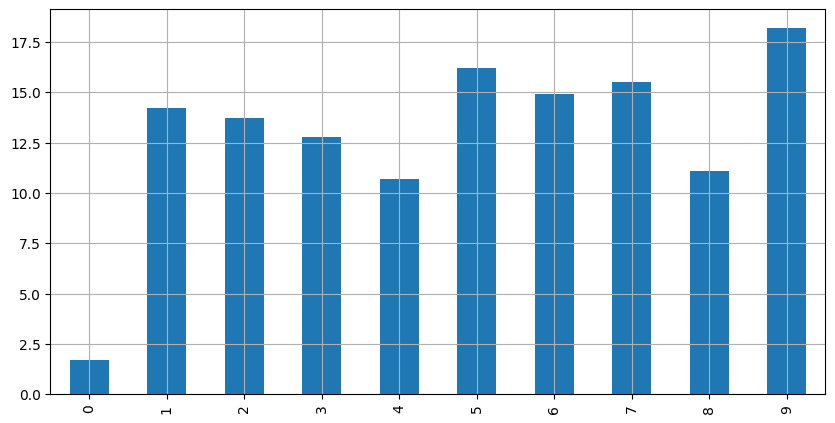

In [25]:
# Построим диаграмму:

tutorial_finished_group_repeat['percent'].plot(
    kind='bar',
    grid=True,
    figsize=(10, 5)
);

#### Выводы:
Наибольшее количесиво покупок платных пакетов вопросов, так же производилось при совершении 2 попытки прохождения обучения 1138, но процент в отношении к кол-ву зарегистрированных пользователей 14,2 %. Максимальный процент у пользователей прошедших обучение с 10 попытки, но кол-ва зарегистрированных всего 22 пользователя.

Можно сделать общий вывод из представленных данных, кол-во попыток прохождения обучения снижает вероятность оплаты и приобретения обучения. Не важно, начали они обучение или закончили, пользователи, начиная от 3 попытки, значительно снижаются. От сюда снижается вероятность оплаты, так как усреднённый процент от 11% до 18% от кол-ва зарегистрированных на этапе попыток пройти обучение. 

# **ГИПОТЕЗА №3**
Если пользователь сначала выбирает сложность обучения, будет ли он потом проходить обучение?

Проверим, насколько прозрачен процесс взаимодействия с игрой.

In [26]:
#Сформируем сводную таблицу по самому позднему времени прохождения этапа.
user_time_max = total_data.pivot_table (values = ['event_datetime'], \
                                               index = ['user_id'], columns = ['event_type'], aggfunc = max)
user_time_max.reset_index(inplace = True)
user_time_max.columns = ['user_id', 'level_choice', 'pack_choice', 'purchase', 'registration', \
                           'tutorial_finish', 'tutorial_start']

In [27]:
# Отфильтруем таблицу, оставив только тех пользователей, у которых 
# время прохождения обучения больше, чем время выбора уровня сложности

user_time_table_thesis = user_time_max.loc[user_time_max['tutorial_start'] > user_time_max['level_choice']]

# Для сравнения посчитаем, сколько зарегистрированных пользователей
registered_users_count = total_data[total_data["event_type"] == "registration"]["user_id"].nunique()

# И посчитаем пользователей, которые выбрали уровень сложности.
level_choice_users_count =  total_data[ total_data["event_type"] == "level_choice"]["user_id"].nunique()

#user_time_table_thesis
print('сколько зарегистрированных пользователей', registered_users_count)
print('пользователи, которые выбрали уровень сложности',level_choice_users_count)

сколько зарегистрированных пользователей 19926
пользователи, которые выбрали уровень сложности 8340


Посчитаем процент людей, у которых время прохождения обучения больше, чем время выбора уровня сложности,
по отношению ко всем зарегистрированным пользователям:

In [28]:
percent_for_thesis = round(user_time_table_thesis["user_id"].nunique()/registered_users_count*100, 2)
print(
    "Процент пользователей, начавших обучение после выбора уровня сложности (от общего числа зарегистрировавшихся): {}%".format(
        percent_for_thesis
    )
)

Процент пользователей, начавших обучение после выбора уровня сложности (от общего числа зарегистрировавшихся): 6.96%


Посчитаем процент людей, у которых время прохождения обучения больше, чем время выбора уровня сложности,по отношению к пользователям, которые выбрали уровень сложности:

In [29]:

percent_confirmed_from_level_choice = round(user_time_table_thesis["user_id"].nunique()/level_choice_users_count*100, 2)
print(
    "Процент пользователей, начавших обучение после выбора уровня сложности (от общего числа выбравших уровень): {}%".format(
        percent_confirmed_from_level_choice
    )
)

Процент пользователей, начавших обучение после выбора уровня сложности (от общего числа выбравших уровень): 16.62%


In [30]:
# Для каждого пользователя создаем список, который содержит во временной последовательности все события пользователя.

user_path = (
    total_data.groupby(["user_id"])["event_type"].apply(list).reset_index()
)

# Для скорости преобразуем список событий в строку event_path.

user_path["event_path"] = user_path["event_type"].apply(lambda x: " > ".join(x))

# Сгруппируем датафрейм по столбцу event_path, подсчитав число пользователей.

user_paths = (
    user_path.groupby(["event_path"])["user_id"]
    .nunique()
    .sort_values(ascending=False)
)

print(user_paths.count())

624


Найдем пользователей, которые сначала выбрали уровень сложности, а затем проходили обучение

In [31]:
# Выберем те пути, где сначала идет выбор уровня сложности, а потом обучение:

user_paths[user_paths.index.str.contains('level_choice > tutorial_start')].count()

np.int64(155)

In [32]:
# определим процент пути, где сначала идет выбор уровня сложности, а потом обучение:
percent_level_choice_tutorial_start = round(user_paths[user_paths.index.str.contains('level_choice > tutorial_start')].count()*100/user_paths.count(), 2)
print("процент пути, где сначала идет выбор уровня сложности, а потом обучение", percent_level_choice_tutorial_start, "%")

процент пути, где сначала идет выбор уровня сложности, а потом обучение 24.84 %


#### Вывод:
Если пользователь сначала выбирает сложность обучения, будет ли он потом проходить обучение? Гипотеза подстверждается, процент пути, где сначала идет выбор уровня сложности, а потом обучение 24.84 %. Не все пользователи (624), но 1/4 часть пользуются данным путем (155). 


# **ОБЩИЕ ВЫВОДЫ**

##### Мы исследовали поведение пользователей в обновлённом приложении.

Проверили три гипотезы:
* **том, что обучение сокращает время прохождения этапов игры;**
Мы видим отличие времени прохождения различных этапов у пользователей, которые прошли обучение, и пользователей, не начинавших обучение. Гипотеза подтверждается, обучение сокращает время прохождения этапов игры, но не на первых двух этапов.  
    * Среднее время, от регистрации до момента выбора уровня сложности: не проходили обучение 7.1 час., проходили обучение 4.18 час. 
    * Среднее время, от выбора уровня сложности до момента выбора пакета вопросов: 0.09 час. одинаковое врем для двух групп
    * Среднее время, от выбора пакета вопросов до момента оплаты: не проходили обучение 89.12 час., проходили обучение 100.83 час.
    * Среднее время, от регистрации до момента оплаты: не проходили обучение 96.3 час., проходили обучение 105.1 час.

* **том, что успешное обучение влияет на оплату;**
Можно сделать общий вывод из представленных данных, кол-во попыток прохождения обучения снижает вероятность оплаты и приобретения обучения. Не важно, начинали они обучение или закончили, пользователи, от 3 попыток значительно снижаются. От сюда снижается вероятность оплаты, так как усреднённый процент от 11% до 18% от кол-ва зарегистрированных на этапе попыток пройти обучение. 

* **том, насколько прозрачен процесс взаимодействия с игрой.**
Если пользователь сначала выбирает сложность обучения, будет ли он потом проходить обучение? Гипотеза подстверждается, процент пути, где сначала идет выбор уровня сложности, а потом обучение 24.84 %. Не все пользователи (624), но 1/4 часть пользуются данным путем (155). 


